In [9]:
#on importe les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

#bibliotheque pour l'apprentissage automatique
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mlxtend.plotting 

In [68]:
#lecture du fichier
fifa16=pd.read_csv('C:/Users/User/Documents/training_python/players_16.csv')
fifa16.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,...,64+3,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3
2,9014,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,...,65+3,60+3,60+3,60+3,65+3,59+3,47+3,47+3,47+3,59+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,29,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,28,1987-01-24,182,85,Uruguay,FC Barcelona,...,67+3,65+3,65+3,65+3,67+3,64+3,58+3,58+3,58+3,64+3
5,183277,https://sofifa.com/player/183277/eden-hazard/1...,E. Hazard,Eden Hazard,24,1991-01-07,173,74,Belgium,Chelsea,...,64+2,61+2,61+2,61+2,64+2,58+2,47+2,47+2,47+2,58+2
6,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,33,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,60+3,60+3,60+3,60+3,60+3,56+3,53+3,53+3,53+3,56+3
7,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,23,1992-02-05,174,68,Brazil,FC Barcelona,...,62+3,56+3,56+3,56+3,62+3,58+3,45+3,45+3,45+3,58+3
8,164240,https://sofifa.com/player/164240/thiago-emilia...,Thiago Silva,Thiago Emiliano da Silva,30,1984-09-22,183,79,Brazil,Paris Saint-Germain,...,80+2,84+2,84+2,84+2,80+2,82+2,86+2,86+2,86+2,82+2
9,168542,https://sofifa.com/player/168542/david-josue-j...,David Silva,David Josué Jiménez Silva,29,1986-01-08,170,67,Spain,Manchester City,...,63+2,62+2,62+2,62+2,63+2,58+2,47+2,47+2,47+2,58+2


In [80]:
for i in fifa16.columns:
    #print(i)

SyntaxError: unexpected EOF while parsing (<ipython-input-80-461a0466a261>, line 2)

In [81]:
#fifa16.describe()

In [31]:
critere=['short_name','age','club','international_reputation','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',\
'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',\
'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle']

In [38]:
selected_footballers=fifa16.copy()
critere=critere[1:]
selected_footballers=selected_footballers[(selected_footballers['player_positions'].apply(str)!='Gk')][critere]
selected_footballers=selected_footballers[:200]
selected_footballers=selected_footballers.fillna(0)
for i in selected_footballers.columns:
    selected_footballers[i]=selected_footballers[i].apply(lambda x: str(0) if x==0 else eval(str(x)))
print(selected_footballers)

     attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                         87                 85               96           89   
1                         80                 87               93           88   
2                         84                 86               93           87   
3                         54                 -3                7            3   
4                         82                 89               86           86   
5                         86                 79               95           82   
6                         84                 92               87           80   
7                         72                 83               94           78   
8                         79                 63               68           61   
9                         96                 80               87           83   
10                        85                100               88           79   
11                        84

In [43]:
#on va reduire les dimensions. Elle consiste pour l’ensemble des variables étudiées à imputer leur moyenne et à diviser le résultat par leur écart type. Cette transformation permet de générer des variables ayant une moyenne à 0 et un écart type à 1 tout en conservant les propriétés de corrélation entre ces dernières
#transformation de la donnée en matrice
matrix_footballers=selected_footballers.values

#centre et reduire les variables
scaler=StandardScaler()
scaler.fit(matrix_footballers)

scaler_matrix_footballers=scaler.transform(matrix_footballers)
print(scaler_matrix_footballers)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 0.79611192  0.98494549  1.09781712 ... -1.42327183 -0.92773906
  -0.89353113]
 [ 0.41111825  1.05646086  0.98753916 ... -0.79942068 -0.74153955
  -0.86342563]
 [ 0.63111463  1.02070318  0.98753916 ... -0.5914703  -0.89670581
  -0.77310914]
 ...
 [-2.28383748 -1.73263873 -1.87968788 ... -1.42327183 -1.67253711
  -1.64616854]
 [ 0.85111102  0.26979175  0.54642731 ...  0.24033123  0.53082377
   0.28058323]
 [ 0.30112005 -0.65990811 -0.15199979 ...  1.07213276  1.0894223
   1.09343162]]


In [47]:
#ACP. Cette dernière consiste à transformer des variables corrélées (ou liées) en nouvelles variables décorrélées les unes des autres. Cependant, il est important d’énoncer que cette technique entraîne une détérioration de la représentation des donnée de par la perte d’information.
pca=PCA(random_state=0)
pca.fit(scaler_matrix_footballers)
pca_samples=pca.transform(scaler_matrix_footballers)
print(pca_samples)

[[-3.23912934e+00 -4.17100681e+00 -6.45056591e-02 ...  1.00331310e-01
  -2.16308590e-01  1.83104835e-15]
 [-3.01858139e+00 -2.17530422e+00 -7.33340348e-01 ... -3.88797208e-02
  -9.32824865e-03 -5.84788116e-16]
 [-3.08853591e+00 -3.33728150e+00 -2.55833396e-02 ... -1.79354588e-01
   6.82848257e-02  1.79069980e-17]
 ...
 [ 8.03608608e+00 -5.98855956e-01 -8.70536803e-01 ... -2.99850895e-01
  -5.58878678e-03  2.47521537e-15]
 [-2.03975442e+00 -4.56407797e-02  8.07231959e-01 ...  2.33201856e-02
   7.16817663e-02 -5.08781375e-16]
 [-5.01902440e-01  3.05824362e+00  7.46034711e-01 ... -8.50385303e-02
  -1.44553711e-01 -1.94111508e-15]]


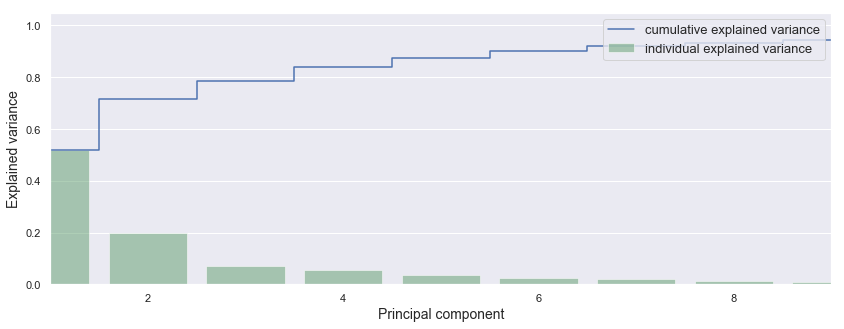

In [54]:
#visualisationde l'inertie en fonction du nombre de composantes
fig, ax=plt.subplots(figsize=(14,5))
sns.set(font_scale=1)
plt.step(range(scaler_matrix_footballers.shape[1]), pca.explained_variance_ratio_.cumsum(),where='mid', label='cumulative explained variance')

sns.barplot(np.arange(1,scaler_matrix_footballers.shape[1]+1),pca.explained_variance_ratio_,alpha=0.5,color='g',label='individual explained variance')
plt.xlim(0,8)

ax.set_xticklabels([s if int(s.get_text()) %2==0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize=14)
plt.xlabel('Principal component', fontsize=14)
plt.legend(loc='upper right',fontsize=13)

#  Naturellement, il faut donc embarquer les composantes ayant absorbé beaucoup d’information telles que les composantes principale 1, 2, 3 et 4. 
#Celles-ci sont visibles sur le diagramme en barre ci-dessous absorbant respectivement  48%, 12.1%, 9.5% et 8% d’information. 
#Afin de rester dans un espace perceptible, le choix a été de prendre les trois premières composantes qui absorbent à elle trois près de 70% de l’information

AttributeError: module 'matplotlib.pyplot' has no attribute 'shpw'

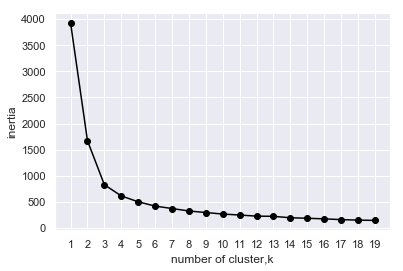

In [65]:
#Determinons le nombre de cluster k 
n_components=3
PCA_components=pd.DataFrame(pca_samples[:,:n_components])
#on attribue des index allant de 1 a 200
PCA_components.index=selected_footballers.index

ks= range(1,20)
inertias=[]
for k in ks:
    #permet de faire varier l'hyperparametre
    model=KMeans(n_clusters=k)
    #fit le modele utilisé
    model.fit(PCA_components.iloc[:,:n_components])
    #stocke l'inertie dans une liste
    inertias.append(model.inertia_)
#Trace le graphique qui resume cette inertie en fonction de l'hyperparametre
plt.plot(ks,inertias, '-o', color='black')
plt.xlabel('number of cluster,k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.shpw()

#De ce fait, à partir du 10ème cluster, l’inertie ne diminue presque plus. Ainsi, le nombre de cluster choisi est 10

In [72]:
#choix du nbre de cluster
n_cluster=10
kmeans=KMeans(init='k-means++', n_clusters=n_cluster, n_init=100, random_state=0)
kmeans.fit(PCA_components.iloc[:,:n_components])
clusters_footballers=kmeans.predict(PCA_components.iloc[:,:n_components])

#Rajout du cluster attribué a chasue joueur
clusters_footballers_series=pd.Series(clusters_footballers)
clusters_footballers_series.index=selected_footballers.index

PCA_components['cluster']=clusters_footballers_series
selected_footballers['cluster']=clusters_footballers_series


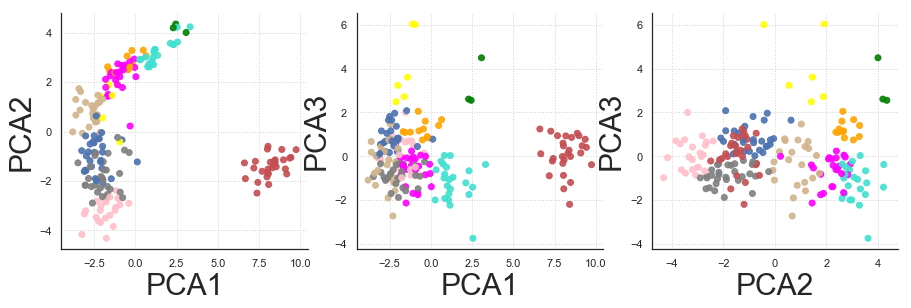

In [79]:
#Du fait que les données sont maintenant projetées dans un espace à 3 dimensions, il est possible de visualiser les clusters selon les 3 plans composés des couples distincts de composantes principales.
from mlxtend.plotting import plot_pca_correlation_graph
sns.set_style('white')
sns.set_context('notebook', font_scale=1, rc={'lines.linewidth':2.5})
LABEL_COLOR_MAP={0:'pink',1:'r',2:'magenta',3:'b',4:'turquoise',5:'yellow',6:'tan',\
                7:'orange',8:'grey',9:'green',10:'green',13:'black'}
label_color=[LABEL_COLOR_MAP[l] for l in pd.Series(clusters_footballers)]
fig=plt.figure(figsize=(15,20))
increment=0
for ix in range(n_components):
    for iy in range(ix+1,n_components):
        increment+=1
        ax=fig.add_subplot(4,3,increment)
        ax.scatter(PCA_components.iloc[:,:4][ix], PCA_components.iloc[:,:4][iy],c=label_color, alpha=0.9)
        plt.ylabel('PCA{}'.format(iy+1),fontsize=30)
        plt.xlabel('PCA{}'.format(ix+1),fontsize=30)
        ax.yaxis.grid(color='lightgray',linestyle=':')
        ax.xaxis.grid(color='lightgray',linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)